In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from oetils import *

In [2]:
W = init_plotting(latex=True, sans=True)

# Smoothing and bootstrapping

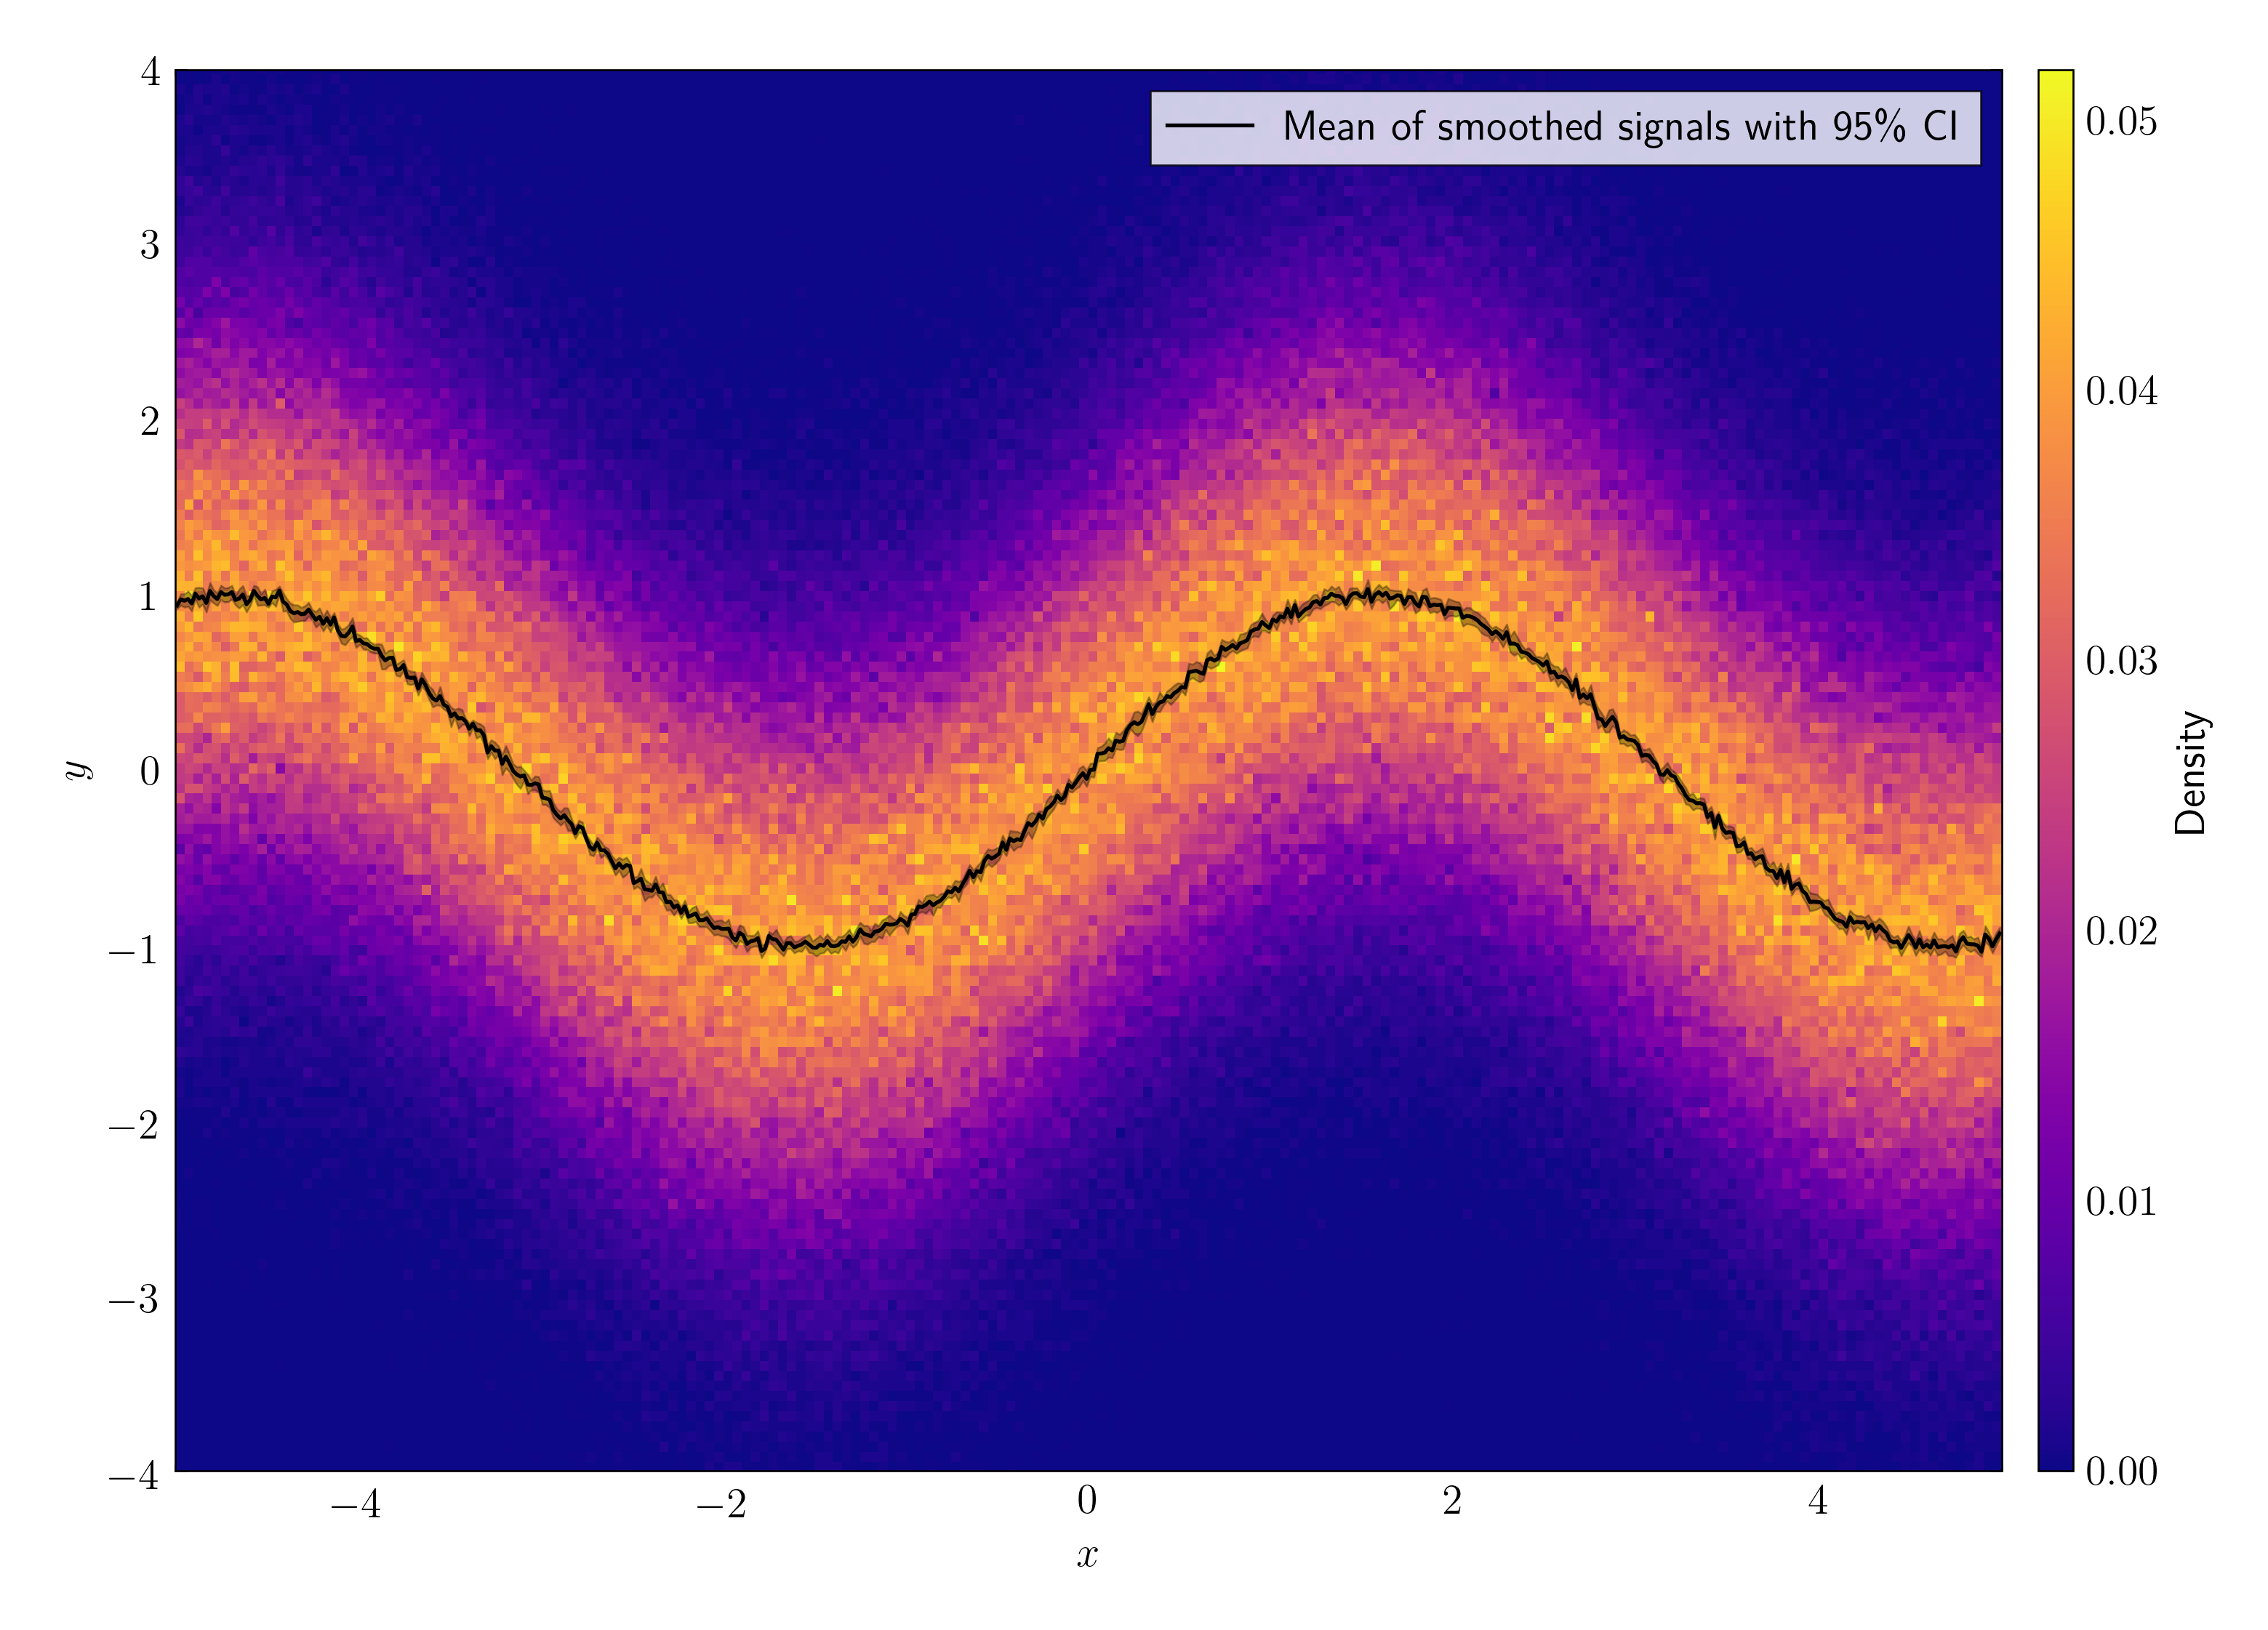

In [3]:
rng = np.random.default_rng(42)
M = 10
N = 100_000
x = np.linspace(-5, 5, N)
y = np.sin(x) + rng.standard_normal((M, N))
t, y_smooth = smooth(y)
y_bs = bootstrap(y_smooth, rng)

fig, ax = plt.subplots()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

I = ax.hist2d(np.broadcast_to(x, (M, N)).ravel(), y.ravel(), bins=200, cmap='plasma', density=True, rasterized=True)[3]
ln, = ax.plot(x[t], y_smooth.mean(0), 'k')
ax.fill_between(x[t], np.quantile(y_bs, 0.025, 0), np.quantile(y_bs, 0.975, 0), color='k', alpha=0.3)
ax.legend([ln], ['Mean of smoothed signals with 95\% CI'])
fig.colorbar(I, ax=ax, label='Density', aspect=40, pad=0.02)
ax.set_ylim(-4, 4)
plt.show()

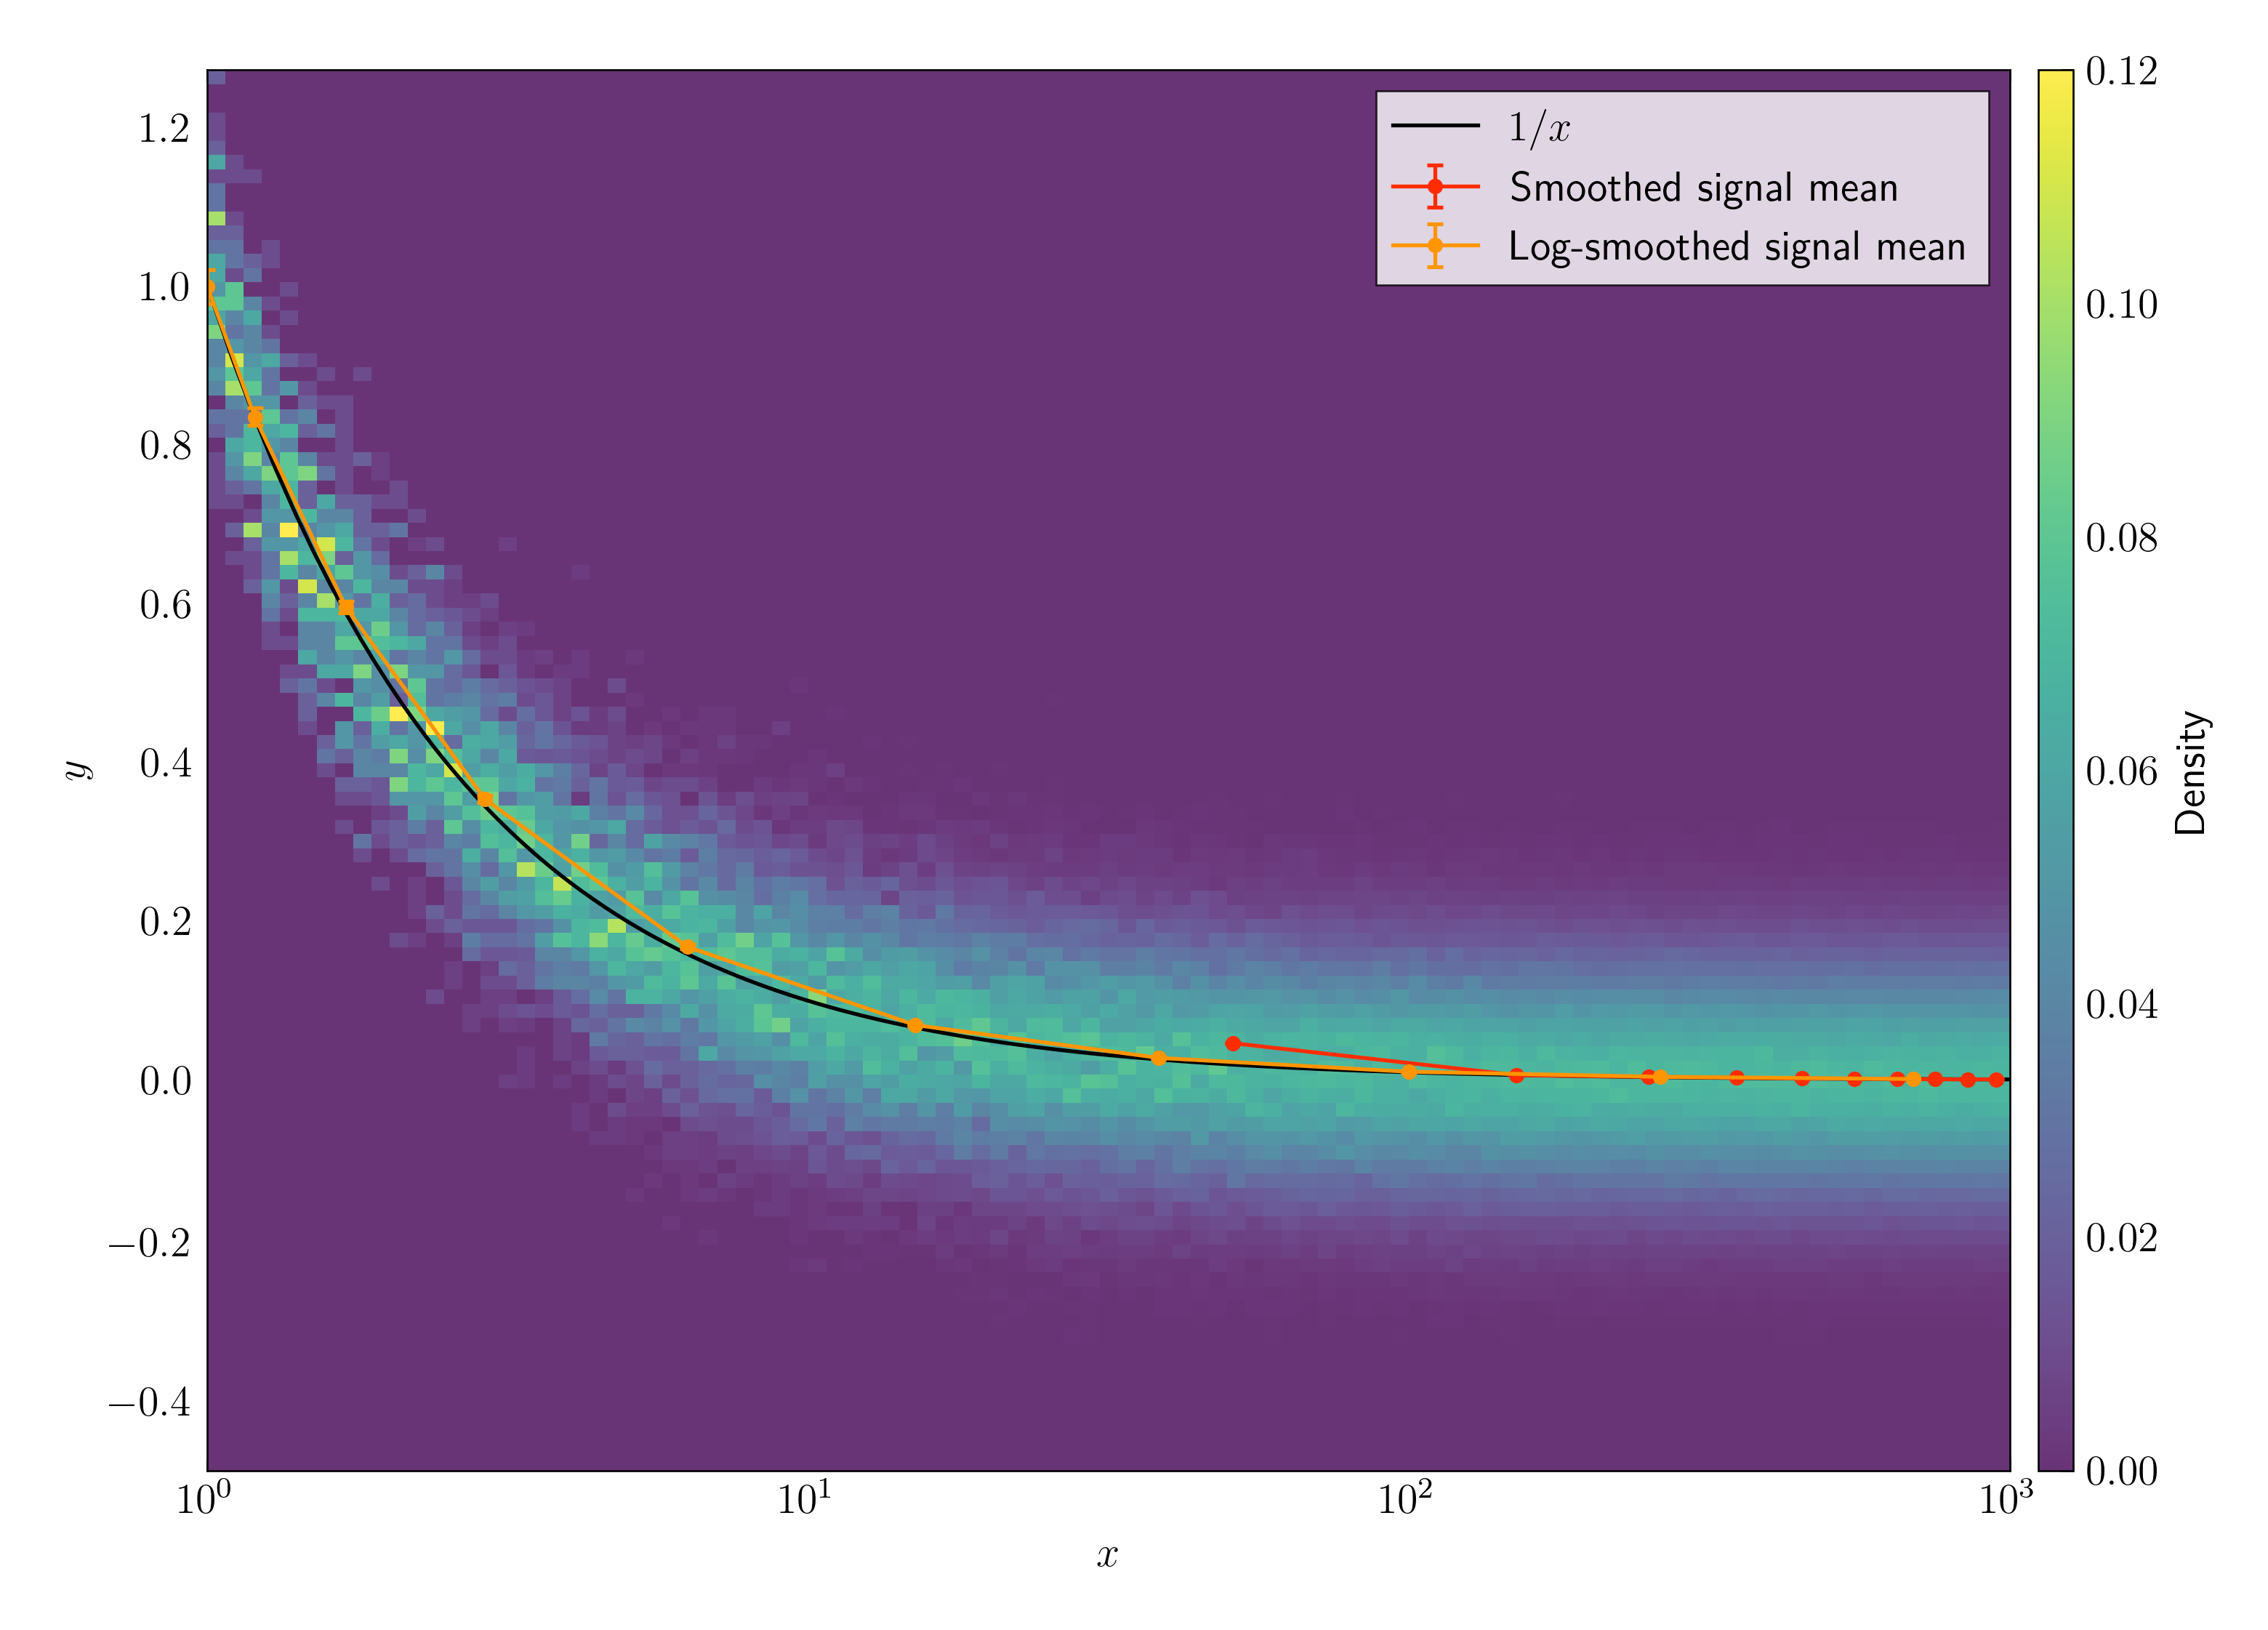

In [4]:
rng = np.random.default_rng(42)
M = 100
N = 10_000
x = np.linspace(1, 1000, N)
y = 1/x + rng.standard_normal((M, N)) * 0.1
t1, y_smooth1 = smooth(y, 10)
y_bs1 = bootstrap(y_smooth1, rng)
t2, y_smooth2 = log_smooth(y, 10)
y_bs2 = bootstrap(y_smooth2, rng)

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
bins_x = np.logspace(np.log10(x.min()), np.log10(x.max()), 100)
bins_y = np.linspace(y.min(), y.max(), 100)
H, xedges, yedges = np.histogram2d(np.broadcast_to(x, (M, N)).ravel(), y.ravel(), bins=[bins_x, bins_y])
H /= H.sum(1)[:, None]
I = ax.pcolormesh(xedges, yedges, H.T, cmap=ListedColormap(0.2 + np.array(plt.cm.viridis.colors) * 0.8))

ax.plot(x, 1/x, 'k', label='$1/x$')
ax.errorbar(x[t1],  y_smooth1.mean(0), yerr=[y_smooth1.mean(0) - np.quantile(y_bs1, 0.025, 0), np.quantile(y_bs1, 0.975, 0) - y_smooth1.mean(0)], color='C3', marker='.', label='Smoothed signal mean')
ax.errorbar(x[t2],  y_smooth2.mean(0), yerr=[y_smooth2.mean(0) - np.quantile(y_bs2, 0.025, 0), np.quantile(y_bs2, 0.975, 0) - y_smooth2.mean(0)], color='C2', marker='.', label='Log-smoothed signal mean')
fig.colorbar(I, ax=ax, label='Density', aspect=40, pad=0.)
ax.legend()
plt.show()

# Plotting styles

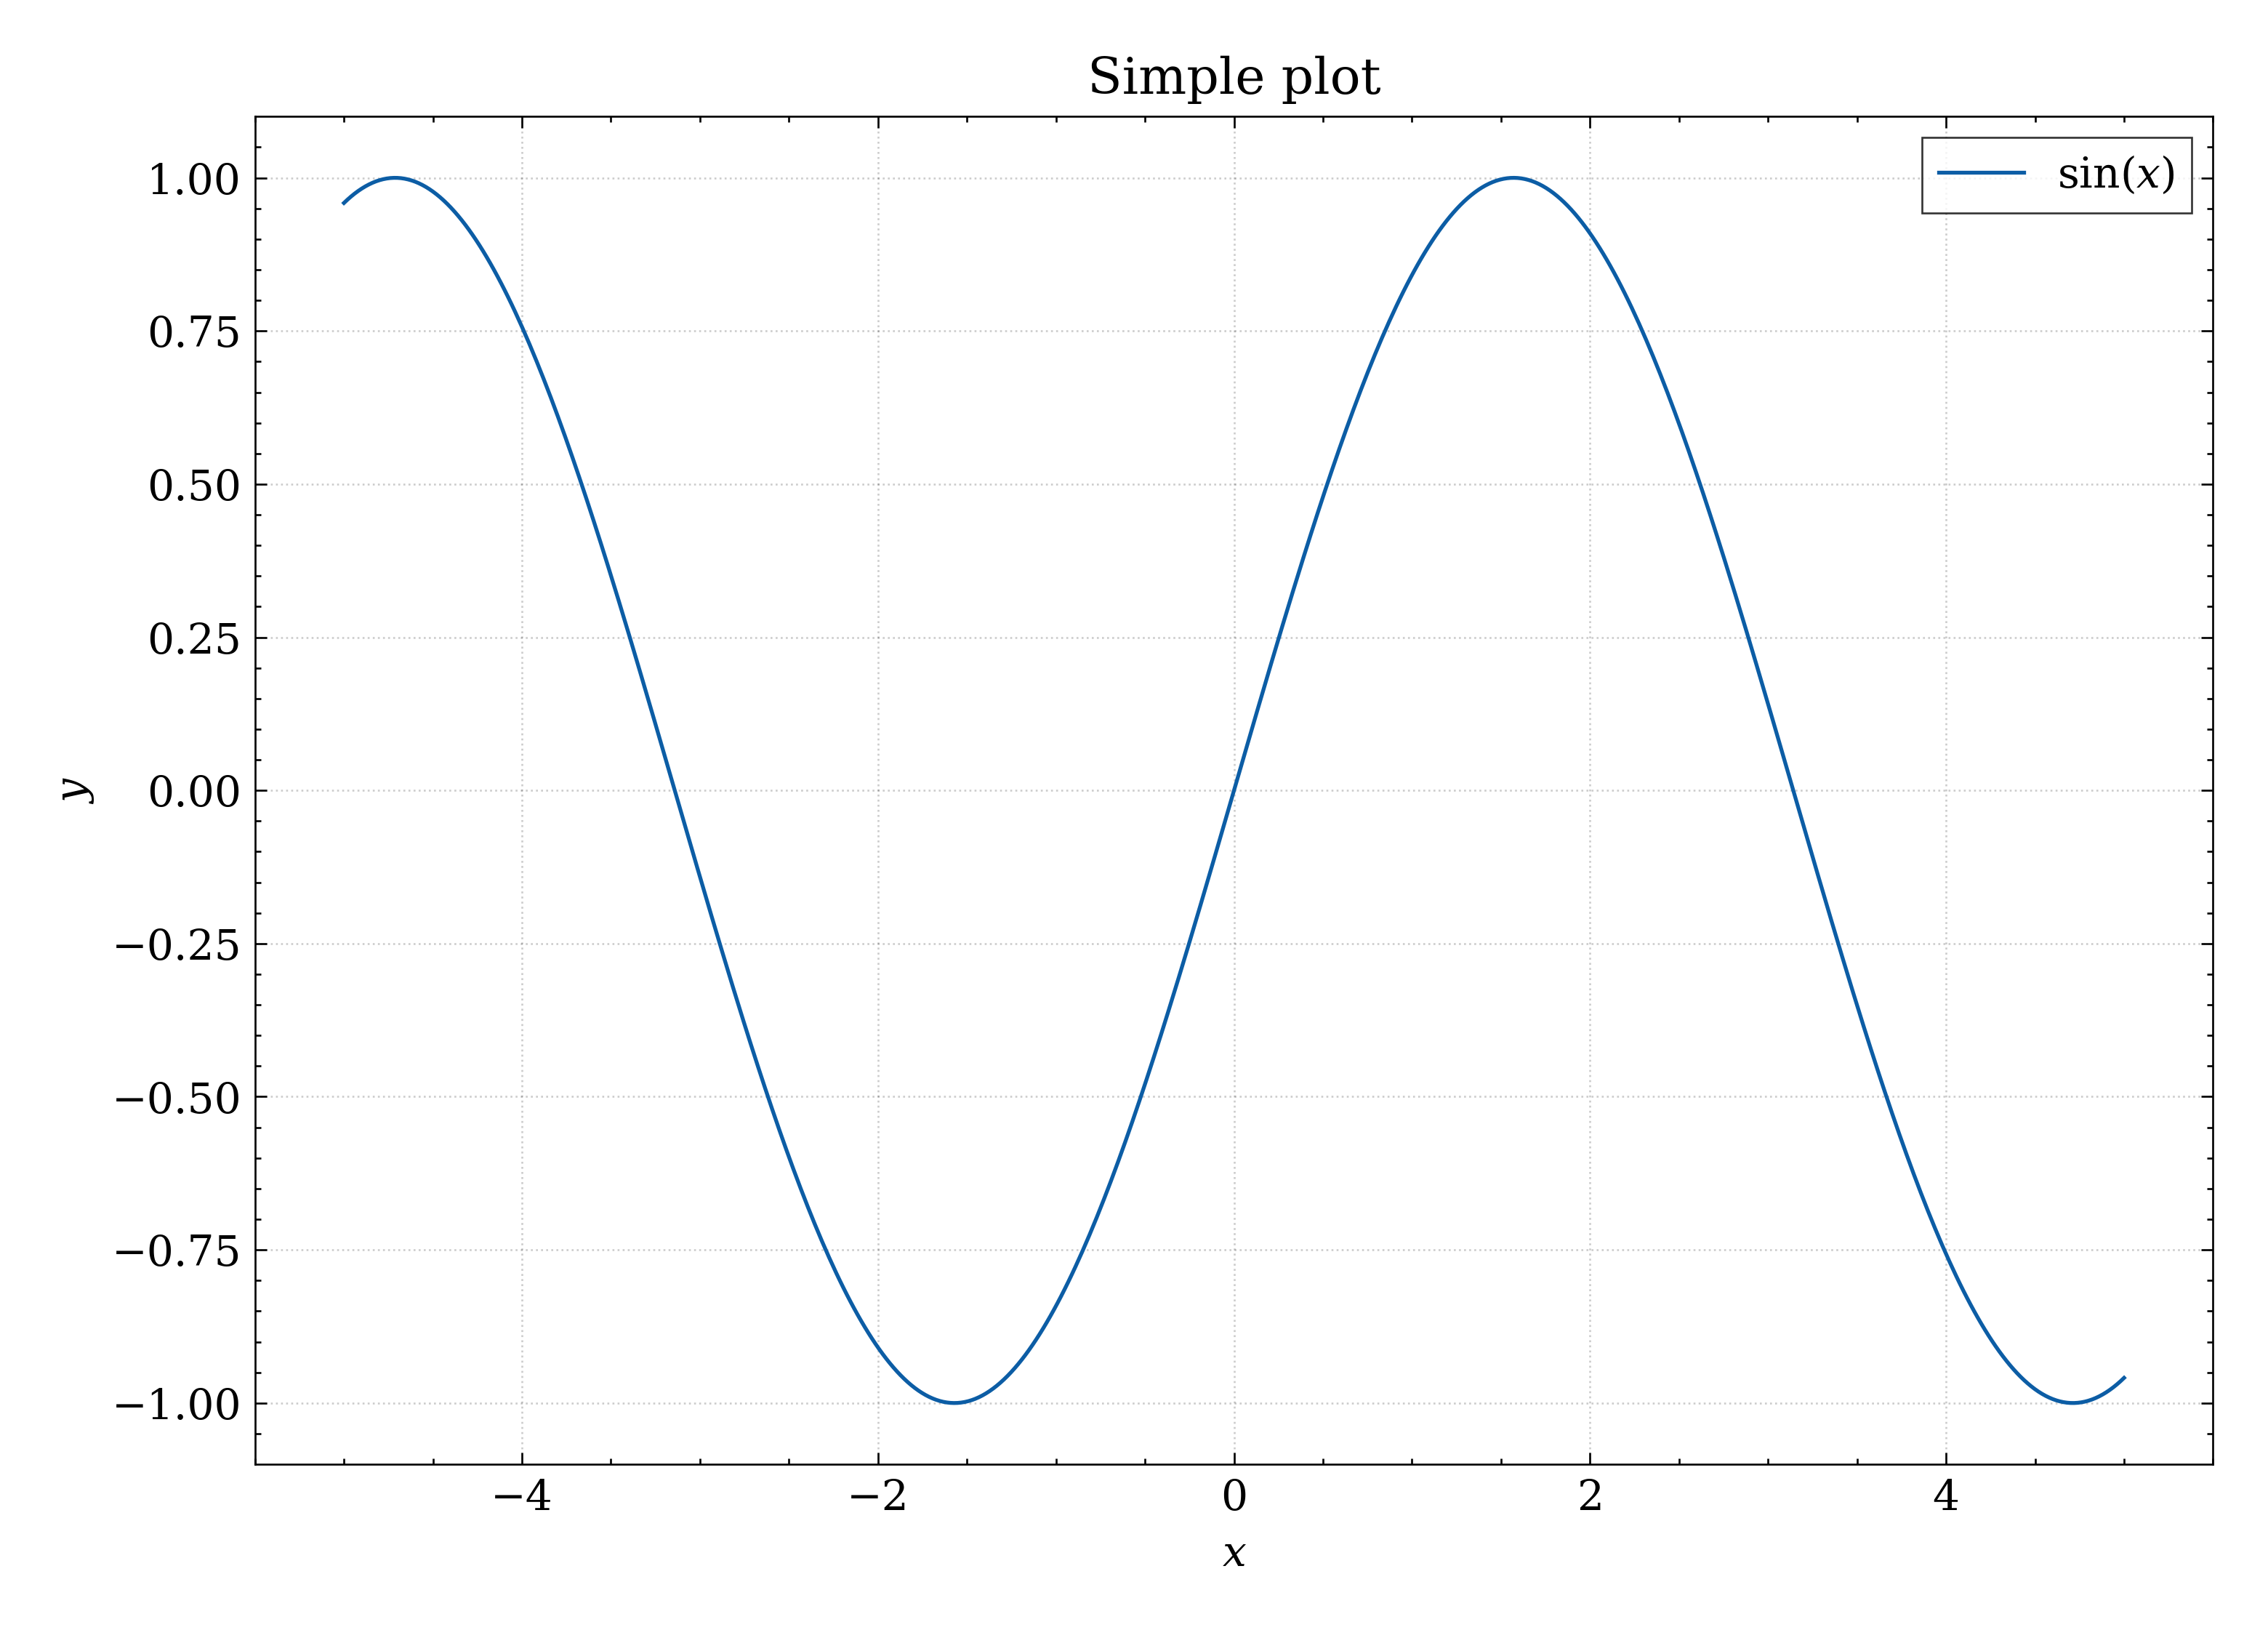

In [5]:
rng = np.random.default_rng(42)
x = np.linspace(-5, 5, 500)
y = np.sin(x)

W = init_plotting()
fig, ax = plt.subplots()
ax.set_title(r"Simple plot")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.plot(x, y, label='$\sin(x)$')
ax.legend()
plt.show()

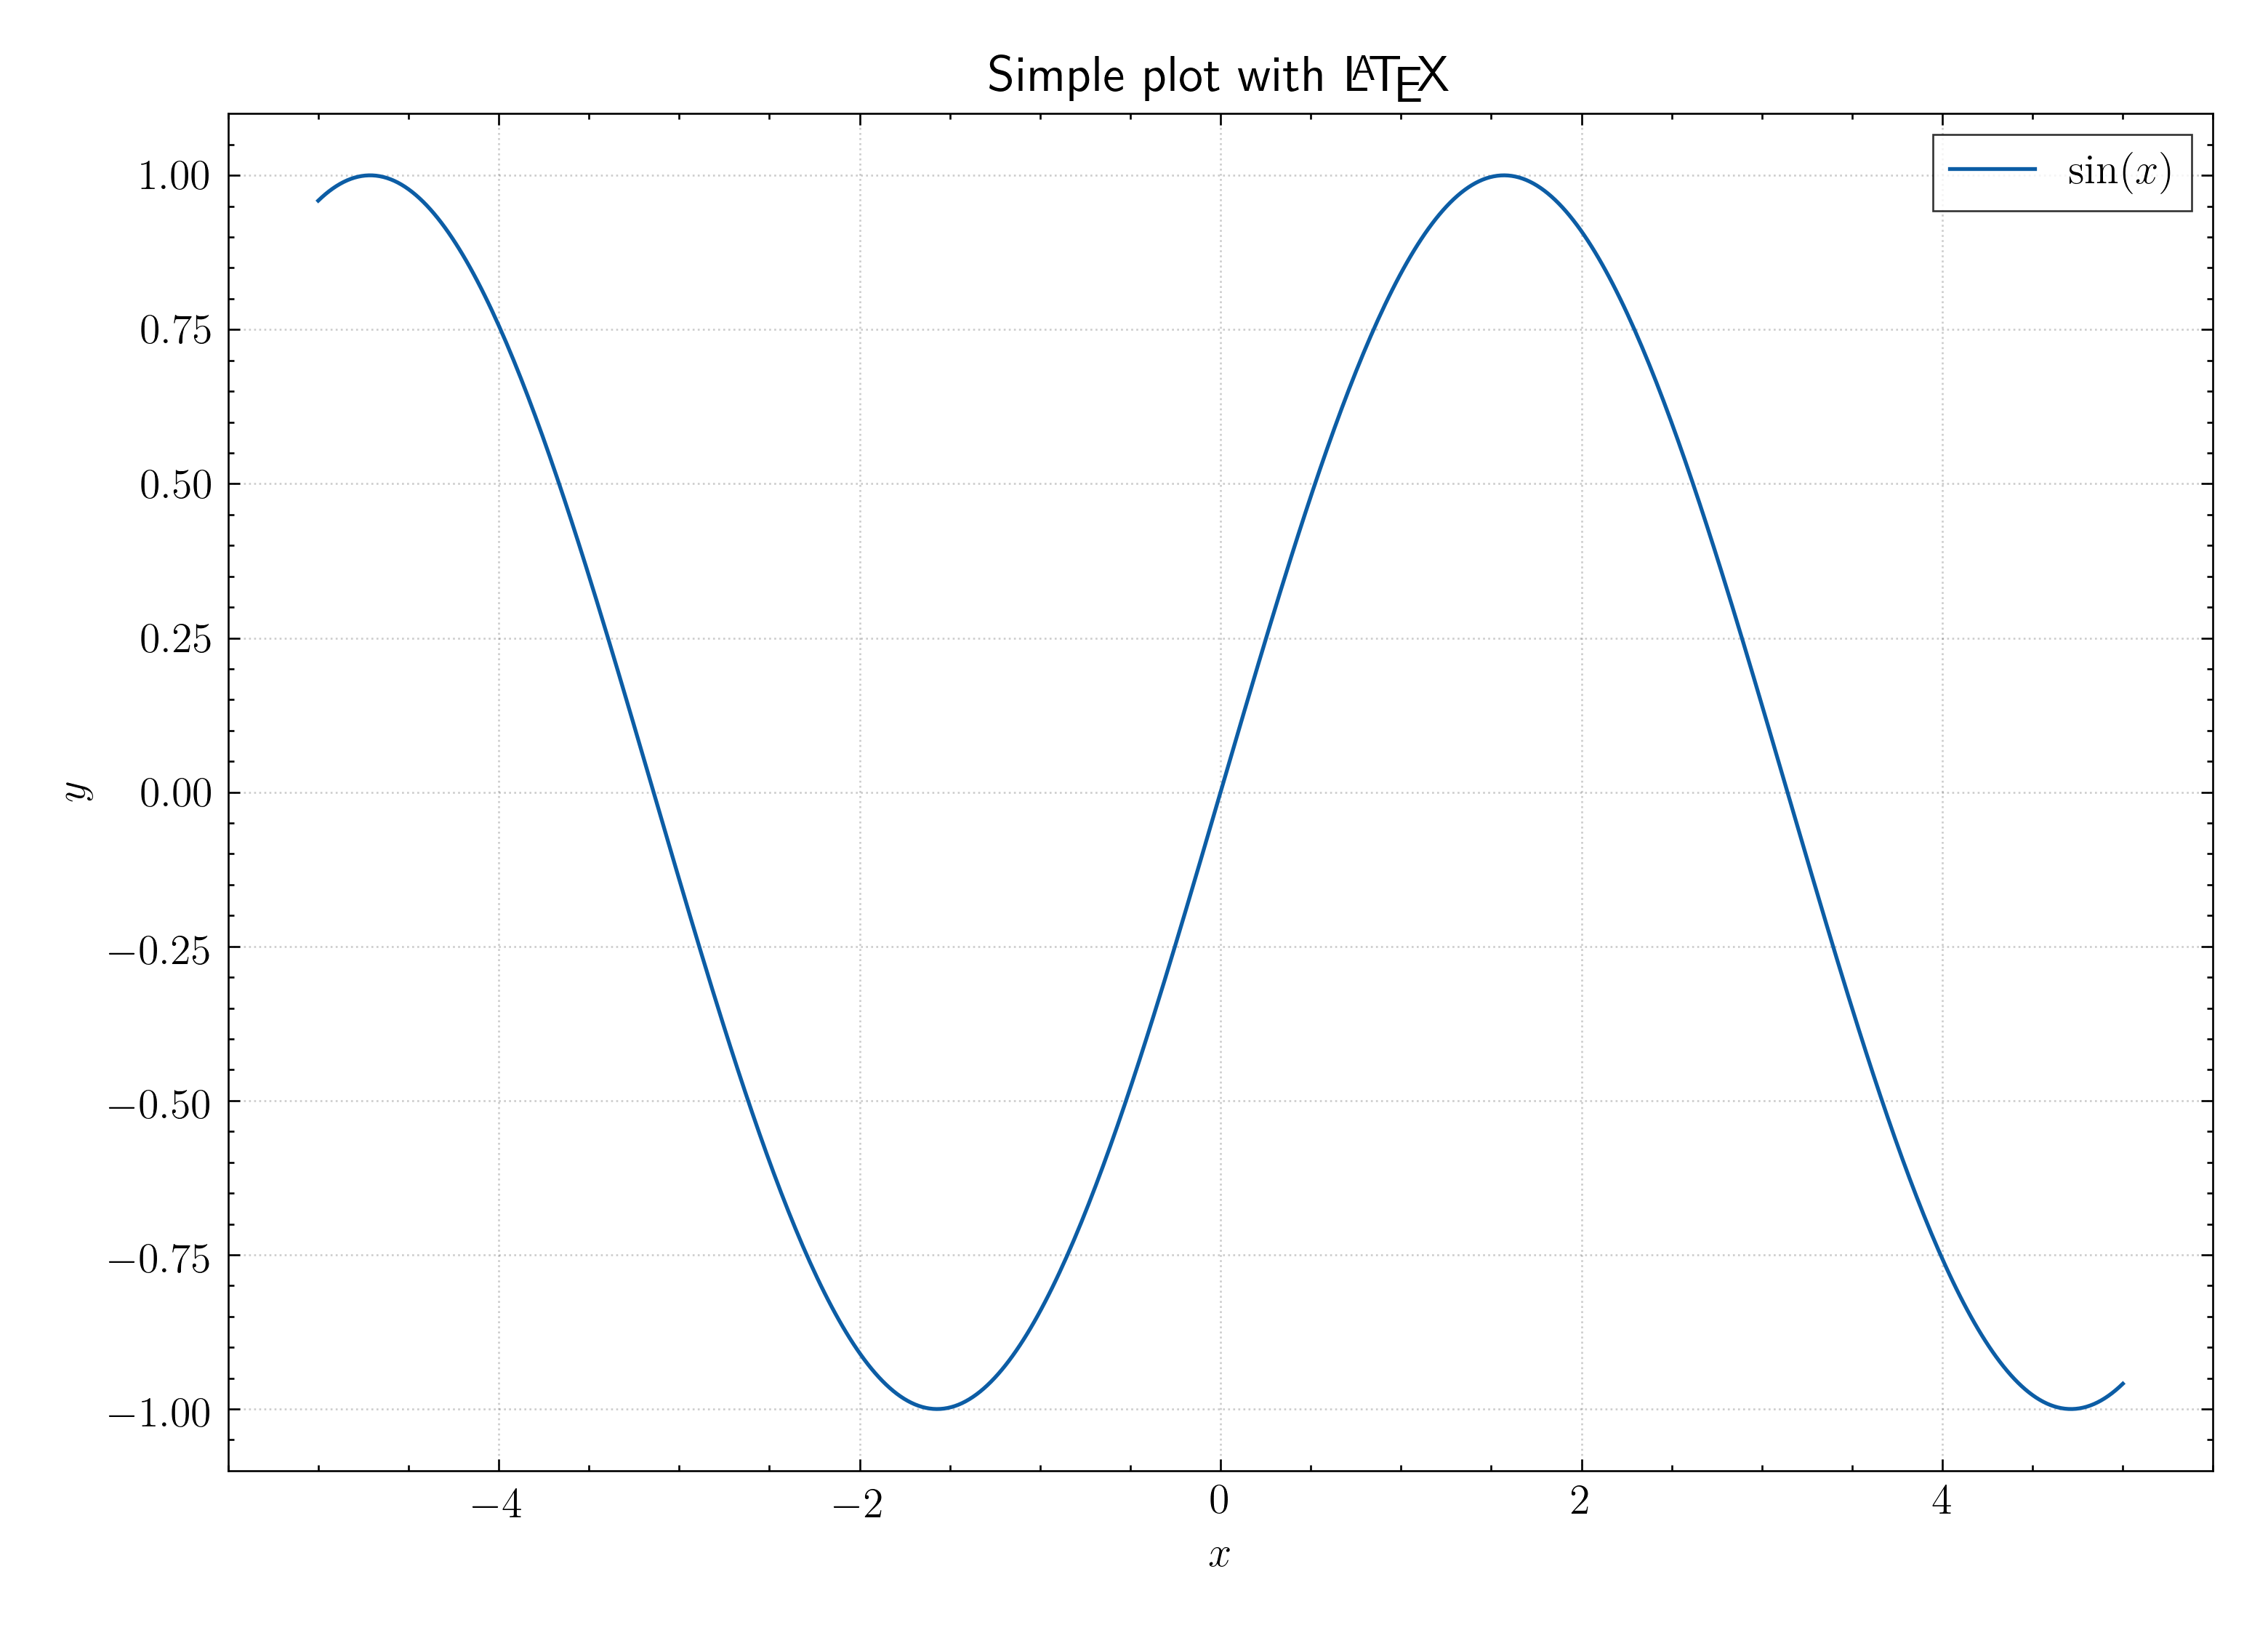

In [6]:
rng = np.random.default_rng(42)
x = np.linspace(-5, 5, 500)
y = np.sin(x)

W = init_plotting(latex=True, sans=True)
fig, ax = plt.subplots()
ax.set_title(r"Simple plot with \LaTeX")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.plot(x, y, label='$\sin(x)$')
ax.legend()
plt.show()

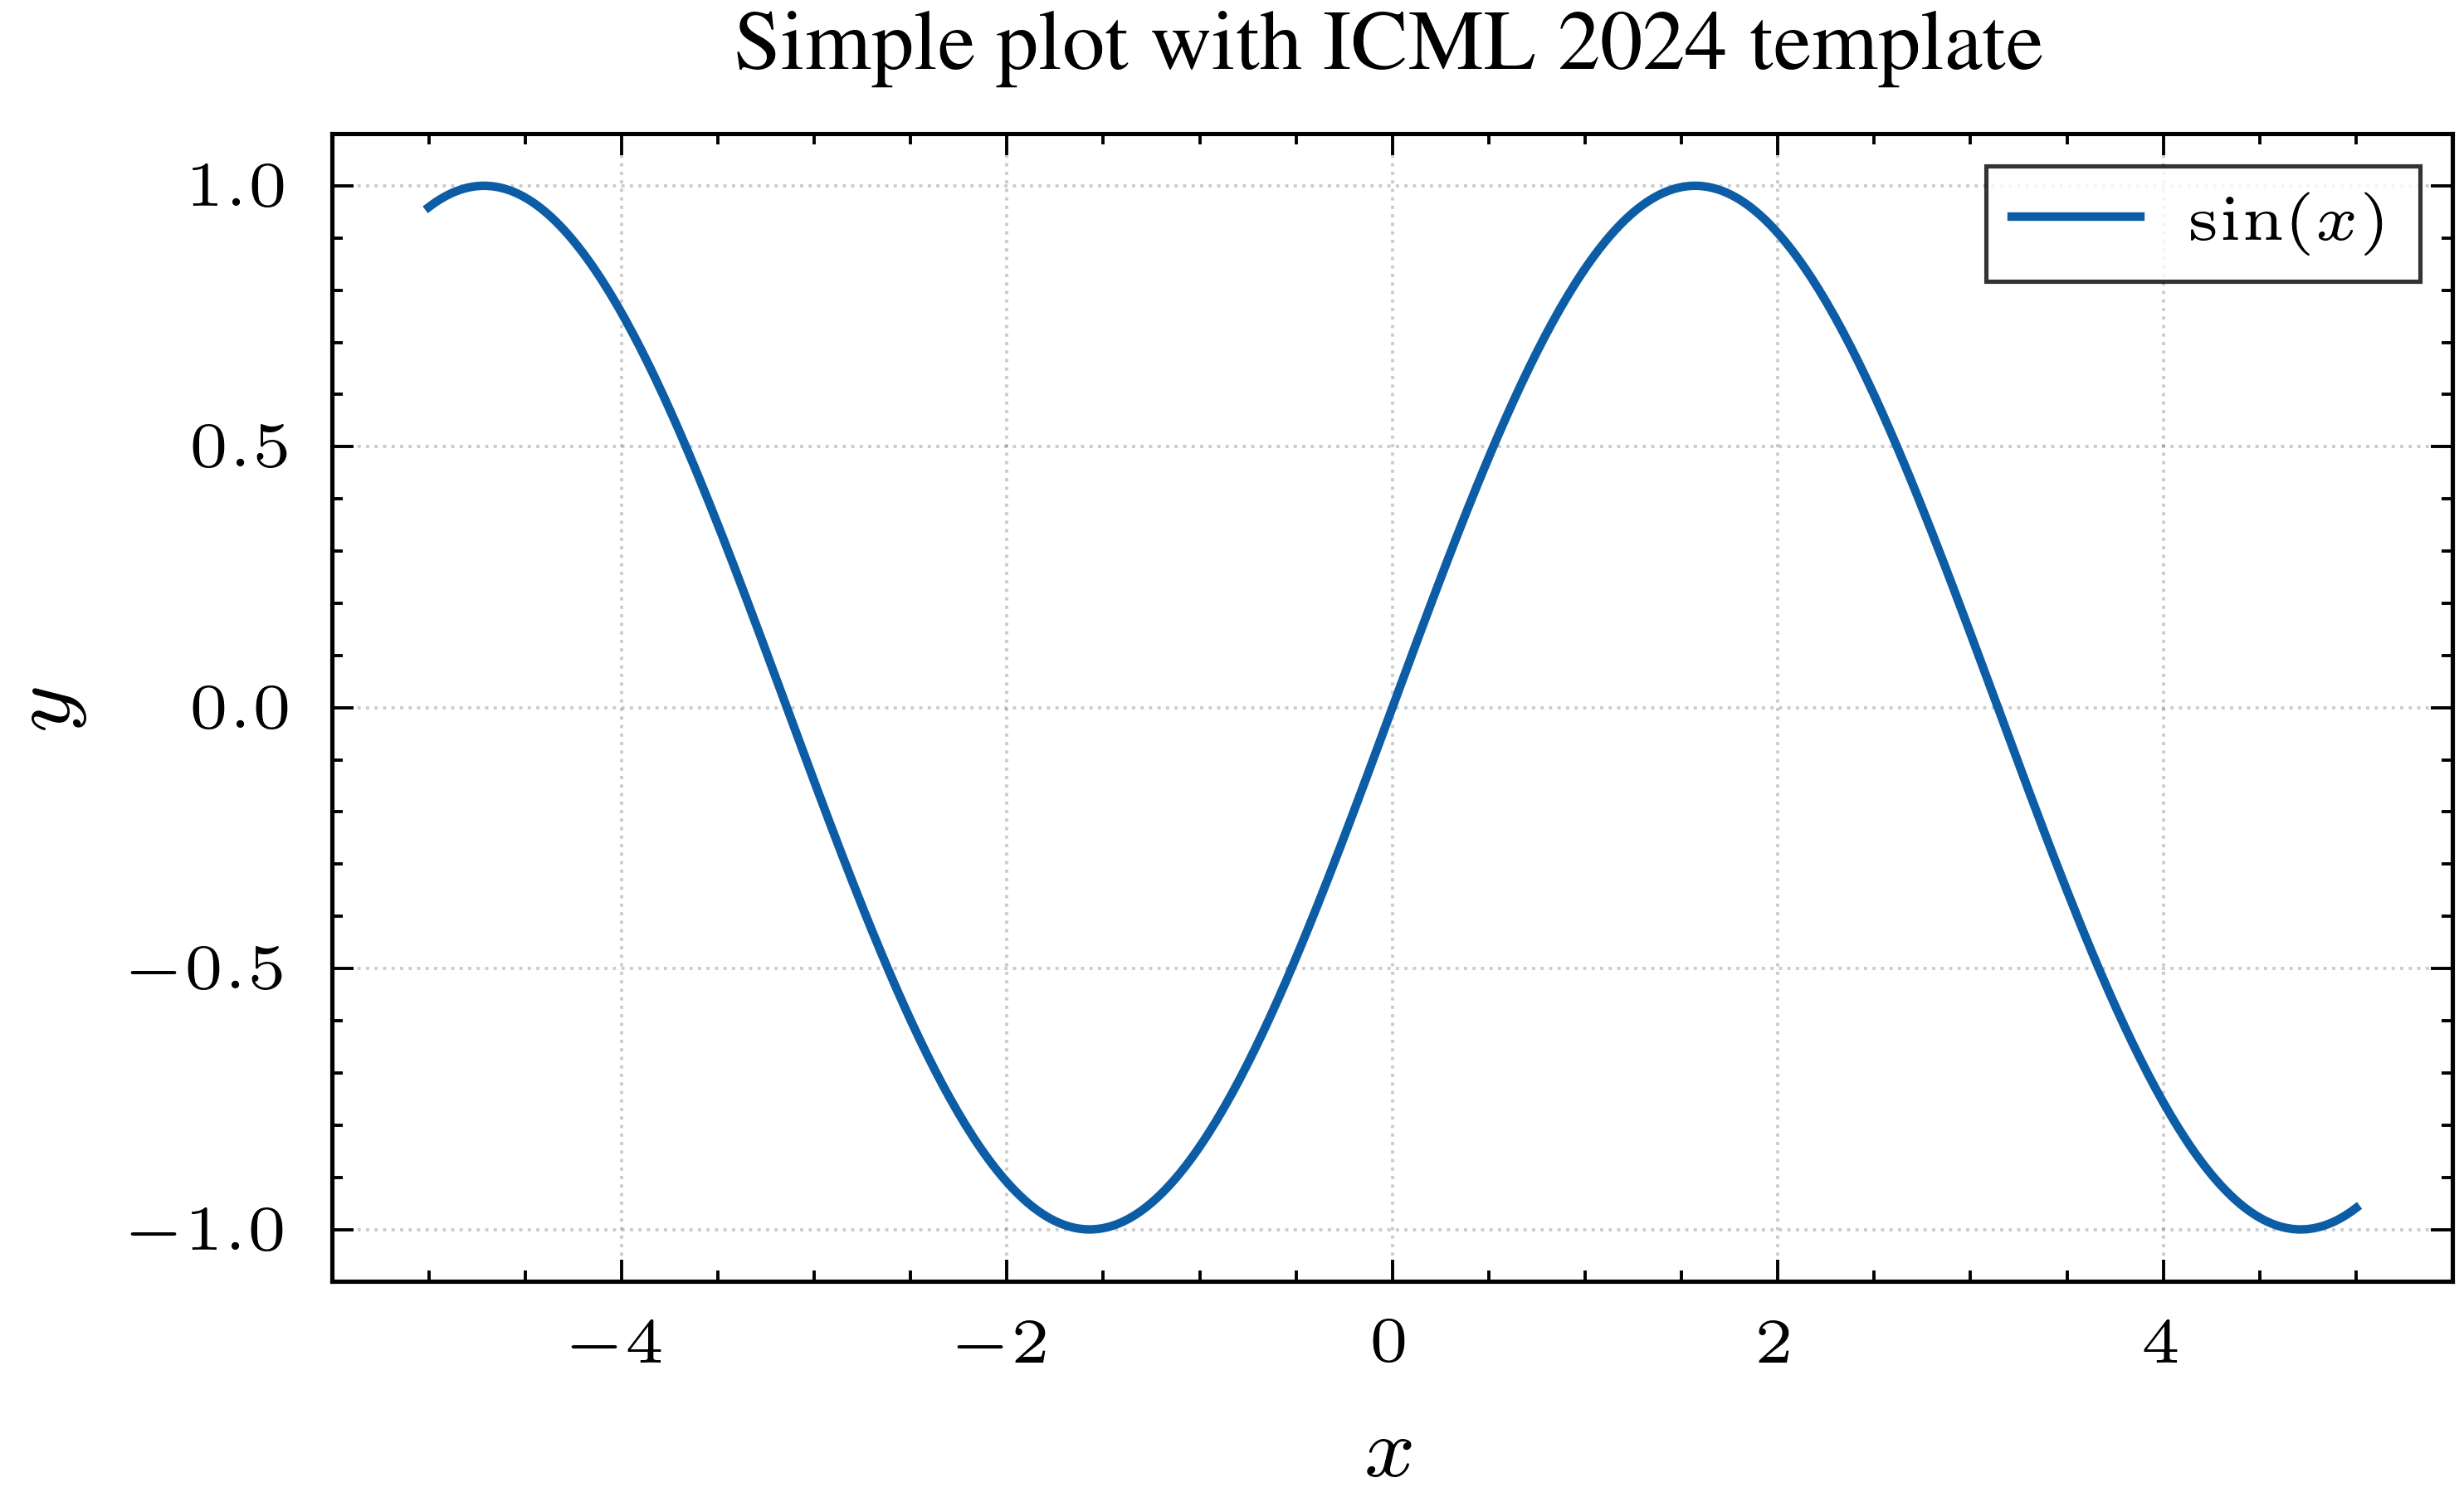

In [7]:
rng = np.random.default_rng(42)
x = np.linspace(-5, 5, 500)
y = np.sin(x)

W = init_plotting('icml2024')
fig, ax = plt.subplots()
ax.set_title(r"Simple plot with ICML 2024 template")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.plot(x, y, label='$\sin(x)$')
ax.legend()
plt.show()